<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/hypothesis_and_ab_testing/hypothesis_and_ab_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приоритизация гипотез и анализ A/B-теста

Цель проекта: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


**Задачи первой части проекта (приоритизация гипотез)**:
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета,
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета,
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


**Задачи второй части проекта (анализ A/B-теста)**:
* Построить график кумулятивной выручки по группам. Сделайтт выводы и предположения,
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения,
* Пострить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения,
* Построить график кумулятивной конверсии по группам. Сделать выводы и предположения,
* Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения,
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**План работы:**
1. Шаг 1. Загрузить данные и подготовить их к анализу,
2. Шаг 2. Приоритизировать гипотезы,
3. Шаг 3. Проанализировать результаты A/B-тест.

**Описание данных:**

В вашем распоряжении три датасета.

**Для первой части проекта:**

- /datasets/hypothesis.csv

**Для второй части проекта:**

- /datasets/orders.csv
- /datasets/visitors.csv


**Структура hypothesis.csv:**


* Hypothesis — *краткое описание гипотезы*
* Reach — *охват пользователей по 10-балльной шкале*
* Impact — *влияние на пользователей по 10-балльной шкале*
* Confidence — *уверенность в гипотезе по 10-балльной шкале*
* Efforts — *затраты ресурсов на проверку гипотезы по 10-балльной шкале*

*Чем больше значение Efforts, тем дороже проверка гипотезы*


**Структура orders.csv:**


* transactionId — *идентификатор заказа*
* visitorId — *идентификатор пользователя, совершившего заказ*
* date — *дата, когда был совершён заказ*
* revenue — *выручка заказа*
* group — *группа A/B-теста, в которую попал заказ*

**Структура visitors.csv:**


* date — *дата*
* group — *группа A/B-теста*
* visitors — *количество пользователей в указанную дату в указанной группе A/B-теста*

## Изучение данных из файла

### Импорт библиотек, настройка отображения данных и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import pylab
import seaborn as sns
import math as mth

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Изучение таблицы hypothesis

In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
hypothesis.duplicated().sum()

0

In [ ]:
pd.DataFrame(round((hypothesis.isna().mean()*100),2),
             columns = ['share_of_missing_values']) \
            .style.background_gradient('coolwarm')

,share_of_missing_values
Hypothesis,0
Reach,0
Impact,0
Confidence,0
Efforts,0


В данном наборе данных нет существенных недостатков: отсутствуют пропущенные значения, дубликаты, типы данных установлены адекватно. Один недостаток - использование в заголовках символов одновременно в верхнем и нижнем регистре. Поправим недостаток.

In [ ]:
hypothesis.columns = hypothesis.columns \
                               .str \
                               .lower()

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Другое дело! Идем к таблице orders.

### Изучение таблицы orders

In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Переменную date необходимо привести к формату даты.

Переменные transactionId и visitorId рекомендуется привести к типу object.

Остальные переменные не нуждаются в преобразовании типов данных.

In [ ]:
orders['date'] = orders['date'].astype('datetime64')
orders['transactionId'] = orders['transactionId'].astype('object')
orders['visitorId'] = orders['visitorId'].astype('object')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null object
visitorId        1197 non-null object
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


Теперь у всех переменных датафрейма подходящий тип данных.

In [ ]:
orders.duplicated().sum()

0

Дубликаты данных отсутствуют.

In [ ]:
pd.DataFrame(round((orders.isna().mean()*100),2),
             columns = ['share_of_missing_values']) \
            .style.background_gradient('coolwarm')

,share_of_missing_values
transactionId,0
visitorId,0
date,0
revenue,0
group,0


Пропусков в данных также нет. Один недостаток: сочетание верхнего и нижнего регистов в названиях переменных. Поправим.

In [ ]:
orders.columns = orders.columns \
                       .str \
                       .lower()

In [ ]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Красота. Переходим к таблице visitors.

### Изучение таблицы visitors

In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.duplicated().sum()

0

In [ ]:
pd.DataFrame(round((visitors.isna().mean()*100),2),
             columns = ['share_of_missing_values']) \
            .style.background_gradient('coolwarm')

,share_of_missing_values
date,0
group,0
visitors,0


В таблице visitors недостатков не выявлено. 

**Общие выводы по разделу:**

1. На этапе предобработки был обнаружен ряд недостатков, которые были исправлены:
- Заголовки содержали одновременно символы верхнего и нижнего регистра;
- Использовались неподходящие типы данных для переменных с датой и временем. Также был заменен тип данных для переменных, содержащих ID (transactionId, visitorId)
2. В остальном в предоставленных данных не наблюдается заметных недостатков: пропуски данных и дубликаты отсутствуют.
3. Данные достаточно чистые, поэтому можно переходить к рассчетам и анализу.

## Приоритизация гипотез

### Фреймворк ICE

**Задача:**

Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [ ]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [ ]:
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000


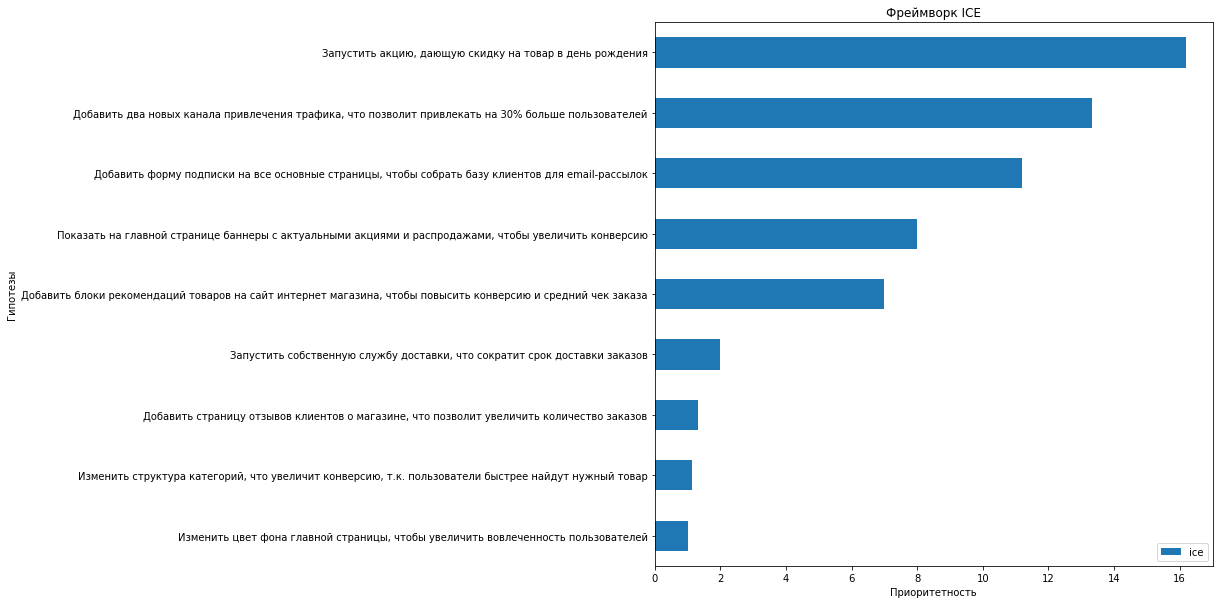

In [ ]:
ax = hypothesis[['hypothesis', 'ice']].set_index('hypothesis') \
                                      .sort_values('ice', ascending=True) \
                                      .plot(kind='barh', figsize=(10,10))
ax.set_xlabel('Приоритетность')
ax.set_ylabel('Гипотезы')
ax.set_title('Фреймворк ICE')
plt.show()

**Выводы по фреймворку ICE:**

1. Наиболее приоритетная для проверки гипотеза: "*Запустить акцию, дающую скидку на товар в день рождения*".
2. Также высоким приоритетом обладают гипотезы: "*Добавить два новых канала привлечения трафика,что позволит привлекать на 30% больше пользователей*" и "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*".
3. Наименее приоритетные гипотезы: "*Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов*", "*Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар*" и "*Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей*".

### Фреймворк RICE

**Задача:**

Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [ ]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [ ]:
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000,3.000


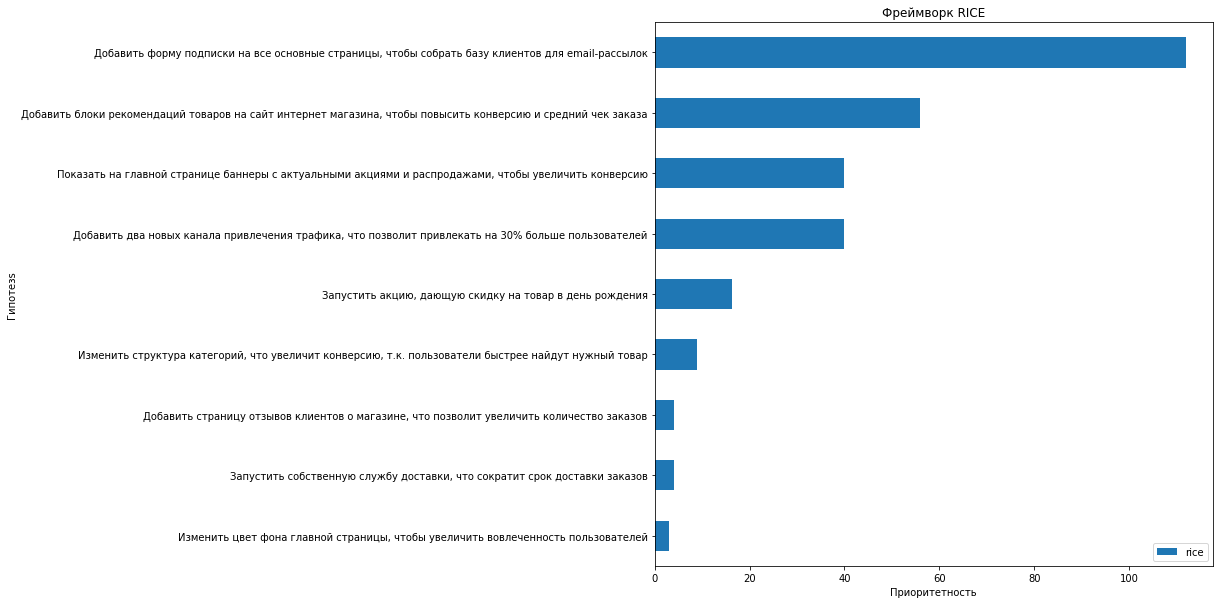

In [ ]:
ax = hypothesis[['hypothesis', 'rice']].set_index('hypothesis') \
                                       .sort_values('rice', ascending=True) \
                                       .plot(kind='barh', figsize=(10,10))
ax.set_xlabel('Приоритетность')
ax.set_ylabel('Гипотезs')
ax.set_title('Фреймворк RICE')
plt.show()

**Выводы по фреймворку RICE:**
1. При применении фреймворка RICE наши гипотезы поменяли порядок приоритетности. 
2. С большим разрывом от остальных гипотез наиболее приоритетная для проверки гипотеза: "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*". Эта же гипотеза входила и в топ-3 гипотезы по оценке фреймворка ICE, так что относительно данной гипотезы с уверенностью можно делать вывод о том, что на ее реализации следует сосредоточиться.

### Отличия ICE и RICE

**Задача:**

Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [ ]:
frameworks = pd.DataFrame()

ice_list = list(hypothesis.sort_values(by='ice', ascending=False)['hypothesis'])
rice_list = list(hypothesis.sort_values(by='rice', ascending=False)['hypothesis'])

frameworks['ice'] = ice_list
frameworks['rice'] = rice_list

frameworks

,ice,rice
0,"Запустить акцию, дающую скидку на товар в день...",Добавить форму подписки на все основные страни...
1,"Добавить два новых канала привлечения трафика,...",Добавить блоки рекомендаций товаров на сайт ин...
2,Добавить форму подписки на все основные страни...,"Добавить два новых канала привлечения трафика,..."
3,Показать на главной странице баннеры с актуаль...,Показать на главной странице баннеры с актуаль...
4,Добавить блоки рекомендаций товаров на сайт ин...,"Запустить акцию, дающую скидку на товар в день..."
5,"Запустить собственную службу доставки, что сок...","Изменить структура категорий, что увеличит кон..."
6,"Добавить страницу отзывов клиентов о магазине,...","Запустить собственную службу доставки, что сок..."
7,"Изменить структура категорий, что увеличит кон...","Добавить страницу отзывов клиентов о магазине,..."
8,"Изменить цвет фона главной страницы, чтобы уве...","Изменить цвет фона главной страницы, чтобы уве..."


Отличия в приоритизации продиктованы тем, что фреймворк RICE более чувствителен к охвату аудитории, а именно учитывает количество пользователей, которых затронет реализация гипотезы.

Поэтому для бизнеса, который ориентируется на больший объем аудитории, более адекватная приоритизация осуществляется по фреймворку RICE. Bнтернет-магазин относится именно к такому типа бизнеса, поэтому для нас наболее приоритетна реализация следующих гипотез (топ-4):

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
2. Добавить блоки рекомендаций товаров на сайт интернет-магазина,
3. Показать на главной странице баннеры с актуальными акциями и распродажами,
4. Добавить два новых канала привлечения трафика.

## Анализ A/B-теста

### Кумулятивная выручка по группам

**Задача:**

Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

In [ ]:
orders_grouped = orders.groupby(['date','group'], as_index=False) \
                       .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'})\
                       .rename(columns={'transactionid':'purchases','visitorid':'buyers'})

In [ ]:
orders_grouped['copy_of_group'] = orders_grouped['group']

In [ ]:
orders_grouped = orders_grouped.set_index(['date','group'])

In [ ]:
cumulative_data = orders_grouped.sort_values(['date','group']) \
                              .groupby('copy_of_group') \
                              .cumsum() \
                              .reset_index()

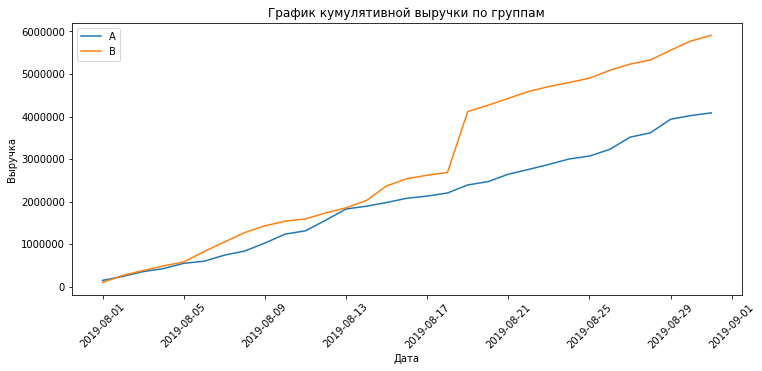

In [ ]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'purchases']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'purchases']]

plt.figure(figsize=(12,5))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
                                                                      
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Выводы относительно графика кумулятивной выручки:**

1. Вплоть до 17 августа куммулятивные значения выручки в обеих группах были приблизительно равны, иногда вперед выходила группа А, иногда - В.
2. После в группе В произошел резкий скачек значения, после которого, однако, значения продолжили накапливаться параллельно друг относительно друга, что наводит на мысль о том, что на ситуацию повлиял выброс/выбросы в группе В.

### Кумулятивный средний чек по группам по группам

**Задача:**

Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

In [ ]:
visitors_cumsum = visitors.groupby(['date','group'], as_index=False) \
                          .agg({'visitors':'sum'}) \
                          .sort_values(['date','group'])

In [ ]:
visitors_cumsum['copy_of_group'] = visitors_cumsum['group']

In [ ]:
visitors_cumsum = visitors_cumsum.set_index(['date','group']) \
                                 .groupby('copy_of_group') \
                                 .cumsum() \
                                 .reset_index()

In [ ]:
cumulative_data = cumulative_data.join(visitors_cumsum[['visitors']])

In [ ]:
cumulative_data['average_check'] = cumulative_data['revenue'] / cumulative_data['purchases']

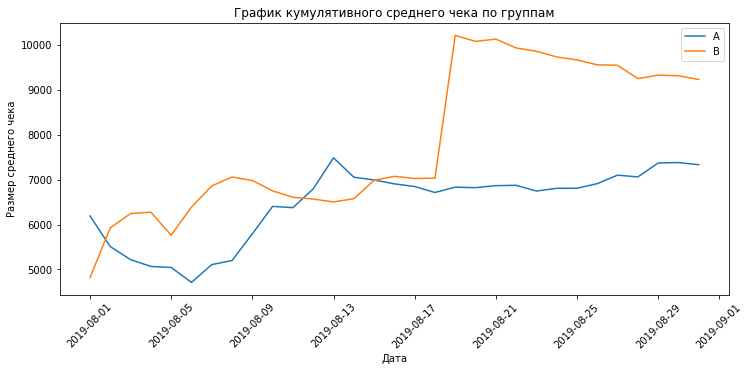

In [ ]:
cummulative_average_check_a = cumulative_data[cumulative_data['group']=='A'][['date', 'average_check']]
cummulative_average_check_b = cumulative_data[cumulative_data['group']=='B'][['date', 'average_check']]

plt.figure(figsize=(12,5))

plt.plot(cummulative_average_check_a['date'], cummulative_average_check_a['average_check'], label='A')
plt.plot(cummulative_average_check_b['date'], cummulative_average_check_b['average_check'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Размер среднего чека")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Выводы относительно графика кумулятивного среднего чека:**

1. Ситуация относительно среднего чека обстоит приблизительно также как и с общим объемом выручки, то есть до 17 августа средний чек в обеих группах колеблется, тогда как после 17 августа средний чек в группе В резко вырывается вперед.
2. Однако далее кривая среднего чека по группе В медленно спускается вниз, что еще раз дает намек на то, что 17 августа был зафиксирован выброс.

### Относительное изменение кумулятивного среднего чека группы В к группе А

**Задача:**

Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

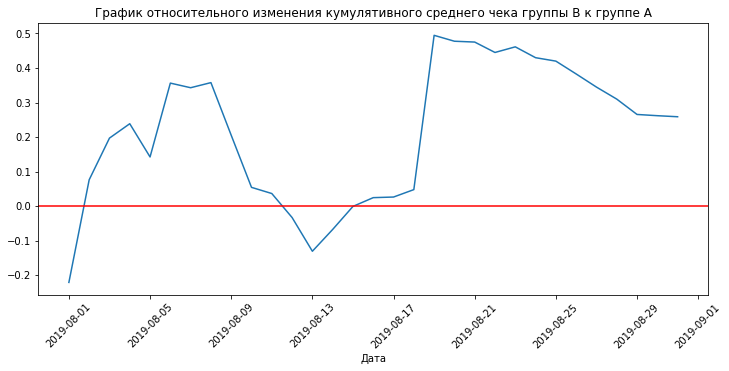

In [ ]:
merged_сumulative_average_check = cummulative_average_check_a[['date', 'average_check']].merge(cummulative_average_check_b[['date', 'average_check']], 
                                            left_on='date',
                                            right_on='date',
                                            how='left',
                                            suffixes=['_A', '_B'])

plt.figure(figsize=(12,5))

plt.plot(merged_сumulative_average_check['date'], merged_сumulative_average_check['average_check_B'] / merged_сumulative_average_check['average_check_A']-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.show()

Вывод относительно графика:

- Как уже отмечалось ранее, до 17 августа B была нестабильна относительно А, после 17 произошел резкий скачок, после которога кривая стабилизировалась в своем медленном снижении.

### Кумулятивная конверсия по группам

**Задача:**

Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

In [ ]:
cumulative_data['cr'] = cumulative_data['purchases'] / cumulative_data['visitors']

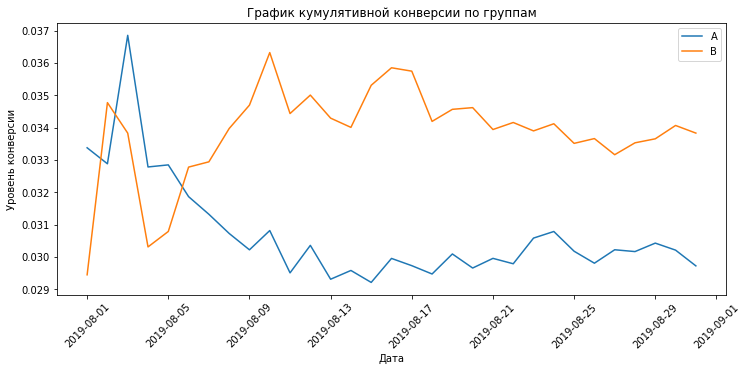

In [ ]:
cummulative_cr_a = cumulative_data[cumulative_data['group']=='A'][['date', 'cr']]
cummulative_cr_b = cumulative_data[cumulative_data['group']=='B'][['date', 'cr']]

plt.figure(figsize=(12,5))

plt.plot(cummulative_cr_a['date'], cummulative_cr_a['cr'], label='A')
plt.plot(cummulative_cr_b['date'], cummulative_cr_b['cr'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Уровень конверсии")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Выводы относительно графика кумулятивной конверсии:**

1. Стабилизировались значения ориентировочно первые 4-5 дней теста.
2. С 5 августа группа B начала вырываться вперед, и стабильно продержалась в лидирующей позиции до конца теста.
3. В совокупности с тем, что на всех предыдущих графиках группа B также показывала более высокие результаты под конец теста, группа B пока выглядит предпочтительнее. Однако выручку и средний чек предварительно стоит посмотреть без учета возможных выбросов.

### Относительное изменение кумулятивной конверсии группы В к группе А

**Задача:**

Построть график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

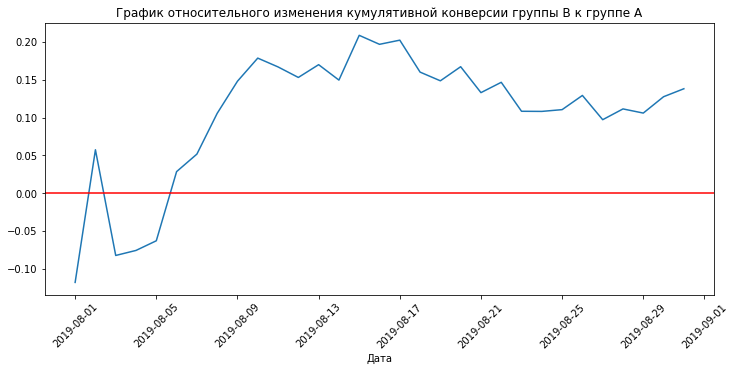

In [ ]:
merged_сumulative_cr = cummulative_cr_a[['date', 'cr']].merge(cummulative_cr_b[['date', 'cr']], 
                                            left_on='date',
                                            right_on='date',
                                            how='left',
                                            suffixes=['_A', '_B'])

plt.figure(figsize=(12,5))

plt.plot(merged_сumulative_cr['date'], merged_сumulative_cr['cr_B'] / merged_сumulative_cr['cr_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.show()

Вывод относительно графика:

- На протяжении большей части теста группа В показывает более высокие результаты по куммулятивной конверсии. Показательно то, что и к концу теста кривая В демонстирует тенденцию к росту относительно А. **Это еще раз дает стимул к тому, чтобы признать группу В более эффективной**.

### Количество заказов по пользователям

**Задача:**

Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [ ]:
orders_by_user = orders.groupby('visitorid', as_index=False) \
                       .agg({'transactionid':'nunique'}) \
                       .rename(columns={'transactionid':'orders'})

In [ ]:
orders_by_user['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: orders, dtype: int64

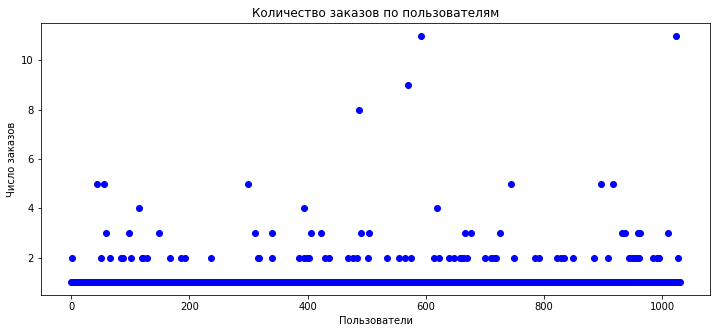

In [ ]:
x_values = pd.Series(range(0,len(orders_by_user['orders'])))

plt.figure(figsize=(12,5))

plt.title('Количество заказов по пользователям')
plt.ylabel("Число заказов")
plt.xlabel("Пользователи")
plt.scatter(x_values, orders_by_user['orders'], color='blue')
plt.show()

**Вывод относительно графика количества заказов по пользователям:**

1. Большая часть аудитории совершает 1 заказ (937 пользователей). 
2. Несколько реже, но довольно распространено оформление 2 заказов (64 пользователя) и 3 заказов (17 пользователей).
3. Другое количество заказов встречается значительно реже, и претендует на роль выбросов. В особенности 11 заказов которые осуществили только 2 пользователя. Возможно эти выбросы и вывели вперед группу B. Изучим далее.

### 95-й и 99-й перцентили количества заказов на пользователя

**Задача:**

Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [ ]:
np.percentile(orders_by_user['orders'], [95, 99])

array([2., 4.])

- 95 поцентиль равен 2
- 99 процентиль равен 4

Как отмечалось выше, существенное количество людей осуществляет 2 заказа, да и 3 встречаются не слишком редко, поэтому **предлагаем за границу для определения аномальных пользователей взять 99 процентиль, то есть 4 заказа**.

### Точечный график стоимостей заказов

**Задача:**

Построить точечный график стоимостей заказов. Сделать выводы и предположения.

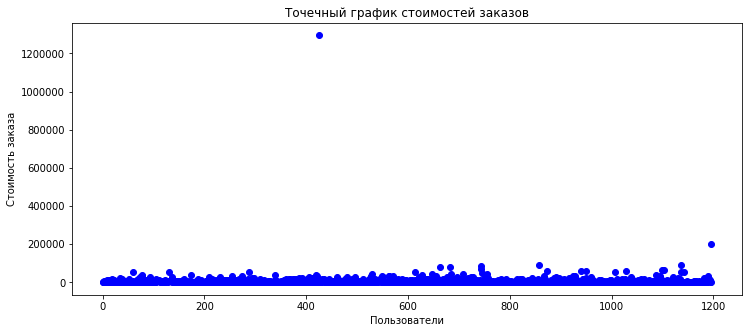

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders['revenue'], color='blue')

plt.title('Точечный график стоимостей заказов')
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.show()

**Выводы относительно графика:**

1. Ожидаемо большинство заказов с низкой стоимостью.
2. На графике заметны 2 выброса: 1 - самый большой в районе 400-го пользователя, 2 - в правой части графика около 1200-го пользователя. Если именно эти пользователи попали в группу В, они могли существенно завысить результаты группы В. Проверим это далее.

### 95-й и 99-й перцентили стоимости заказов

**Задача:**

Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Также предлагаем взять 99 процентиль для определения аномальных заказов, то есть 58233.2.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

**Задача:**

Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

In [ ]:
conversion = orders.groupby('group') \
                   .agg({'transactionid':'count'}) \
                   .rename(columns={'transactionid':'orders'})\
                   .join((visitors.groupby('group') \
                   .agg({'visitors':'sum'}))) \
                   .reset_index()

conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [ ]:
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.030
1,B,640,18916,0.034


Из представленной таблицы видно, что общее число посетителей примерно равно, то есть группы по этому критерию подходят для сравнения.

Уже из таблицы видно, что CR немного отличается, но посмотрим на уровень статистической значимости:

- Будем использовать Z-критерием для разности двух долей
- H0: Конверсия в группе A РАВНА конверсии в группе B
- H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

In [ ]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / mth.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, то есть конверсия в группе A НЕ РАВНА конверсии в группе B")
else:
    print("Не получилось отвергнуть нулевую гипотезу, то есть не получается сделать вывод о неравенстве конверсии в группе A и конверсии в группе B")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу, то есть конверсия в группе A НЕ РАВНА конверсии в группе B


**Основной вывод:**

CR в группе B значимо выше, чем CR в группе A.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Задача:**

Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Будем использовать критерий Манна-Уитни
- H0: Средний чек группы A не отличается от среднего чека группы B
- H1: Средний чек группы A отличается от среднего чека группы B

In [ ]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0, то есть средний чек группы A отличается от среднего чека группы B")
else:
    print("Не получилось отвергнуть H0, то есть не получается сделать вывод о различии значений среднего чека между группами")

p-значение:  0.3646454927716229
Не получилось отвергнуть H0, то есть не получается сделать вывод о различии значений среднего чека между группами


In [ ]:
orders.groupby(by="group") \
      .mean()

,revenue
group,
A,7333.578
B,9230.875


**Основной вывод:**

1. Несмотря на то, что в абсолютных числах средний чек отличается довольно весомо (7333.578 в группе А, 9230.875 в группе B), в категориях статистической значимости существенных отличий нет. Однако эти выводы сделаны на основании сырых данных. Посмотрим, будет ли что-то отличаться, если убрать из вычислений выбросы.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

**Задача:**

Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

Удалим выбросы.

In [ ]:
extreme_values = orders_by_user[orders_by_user['orders'] >= 4]['visitorid'].to_list()

In [ ]:
orders_clear = orders[~orders['visitorid'].isin(extreme_values)]
conversion_clear = orders_clear.groupby('group') \
                               .agg({'transactionid':'count'}) \
                               .rename(columns={'transactionid':'orders'})\
                               .join((visitors.groupby('group') \
                               .agg({'visitors':'sum'}))) \
                               .reset_index()

In [ ]:
conversion_clear['conversion'] = conversion_clear['orders'] / conversion_clear['visitors']

In [ ]:
conversion_clear

,group,orders,visitors,conversion
0,A,517,18736,0.028
1,B,599,18916,0.032


При удалении выбросов разница между группами на первый взгляд осталась прежней, то есть отличие в 4 тысячных: 0.028 в группе А против 0.032 в группе В. Но проверим стастистически.


Будем пользоваться Z-критерием для разности двух долей.
- H0: Конверсия в группе A РАВНА конверсии в группе B
- H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

In [ ]:
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / mth.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, то есть конверсия в группе A НЕ РАВНА конверсии в группе B")
else:
    print("Не получилось отвергнуть нулевую гипотезу, то есть не получается сделать вывод о неравенстве конверсии в группе A и конверсии в группе B")

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу, то есть конверсия в группе A НЕ РАВНА конверсии в группе B


**Основной вывод:**

При очистке данных резульатат теста не поменялся: CR в группе B значимо выше, чем CR в группе A.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Задача:**

Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [ ]:
orders_clear = orders.query('revenue <= 58233.2')

А теперь повторим все то же самое, что и в прошлый раз.

In [ ]:
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0, то есть средний чек группы A отличается от среднего чека группы B")
else:
    print("Не получилось отвергнуть нулевую гипотезу, то есть не получается сделать вывод о неравенстве конверсии в группе A и конверсии в группе B")

p-значение:  0.31043134834237274
Не получилось отвергнуть нулевую гипотезу, то есть не получается сделать вывод о неравенстве конверсии в группе A и конверсии в группе B


In [ ]:
orders.groupby(by="group") \
      .mean()

,revenue
group,
A,7333.578
B,9230.875


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Полагаю, что в строке выше должна быть таблица <code>orders_clear</code></div> <br>

**Основной вывод:**

- Даже после очистки данных не наблюдается статистически значимого отличия между средними чеками.

### Результаты теста

**Задача:**

Принять решение по результатам теста и объяснить его.

***Так как группы А и В равномерно распределены, тест проводился достаточное количество времени для анализа изменений в онлайн-магазине, а куммулятивные графики вышли на плато, то тест можно останавливать.***

***По его результатам можно заключить, что CR в группе B статистически значимо выше, чем CR в группе A.
Тогда как по среднему чеку отличия между группами отсутствуют.***

***Поэтому, если в приоритете стоит оптимизация CR, то изменения, которые тестировались в данном тесте, стоит вносить. Тогда как на среднем чеке изменения не скажутся, и стоит тестировать другие гипотезы.***